In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
from plot_utils import plt2D
from cal_utils import qsatw

In [4]:
path = "../data/am4/"
year = '20100101-20141231'
exp = 'c96L33_am4p0_qadt_cosp_2010'
hemisphere = 'nh'

f = xr.open_mfdataset(path + hemisphere + '_' + year + "_average_transect_" + exp +"_all.nc",decode_cf = True).load()
f.close()

fon = xr.open_mfdataset(path + hemisphere + '_' + year + "_average_transect_" + exp +"_onice.nc",decode_cf = True).load()
fon.close()

foff = xr.open_mfdataset(path + hemisphere + '_' + year + "_average_transect_" + exp +"_office.nc",decode_cf = True).load()
foff.close()

fon = fon.sel(distance = slice(-6.5, 6.5))
foff = foff.sel(distance = slice(-6.5, 6.5))
f = f.sel(distance = slice(-6.5, 6.5))

In [5]:
pres = f.level.expand_dims(distance = f['distance'].size).transpose().expand_dims(season = f['season'].size)
f['qsati'] = qsatw(f.temp + 0.5,pres) - qsatw(f.temp - 0.5,pres)
fon['qsati'] = qsatw(fon.temp + 0.5,pres) - qsatw(fon.temp - 0.5,pres)
foff['qsati'] = qsatw(foff.temp + 0.5,pres) - qsatw(foff.temp - 0.5,pres)

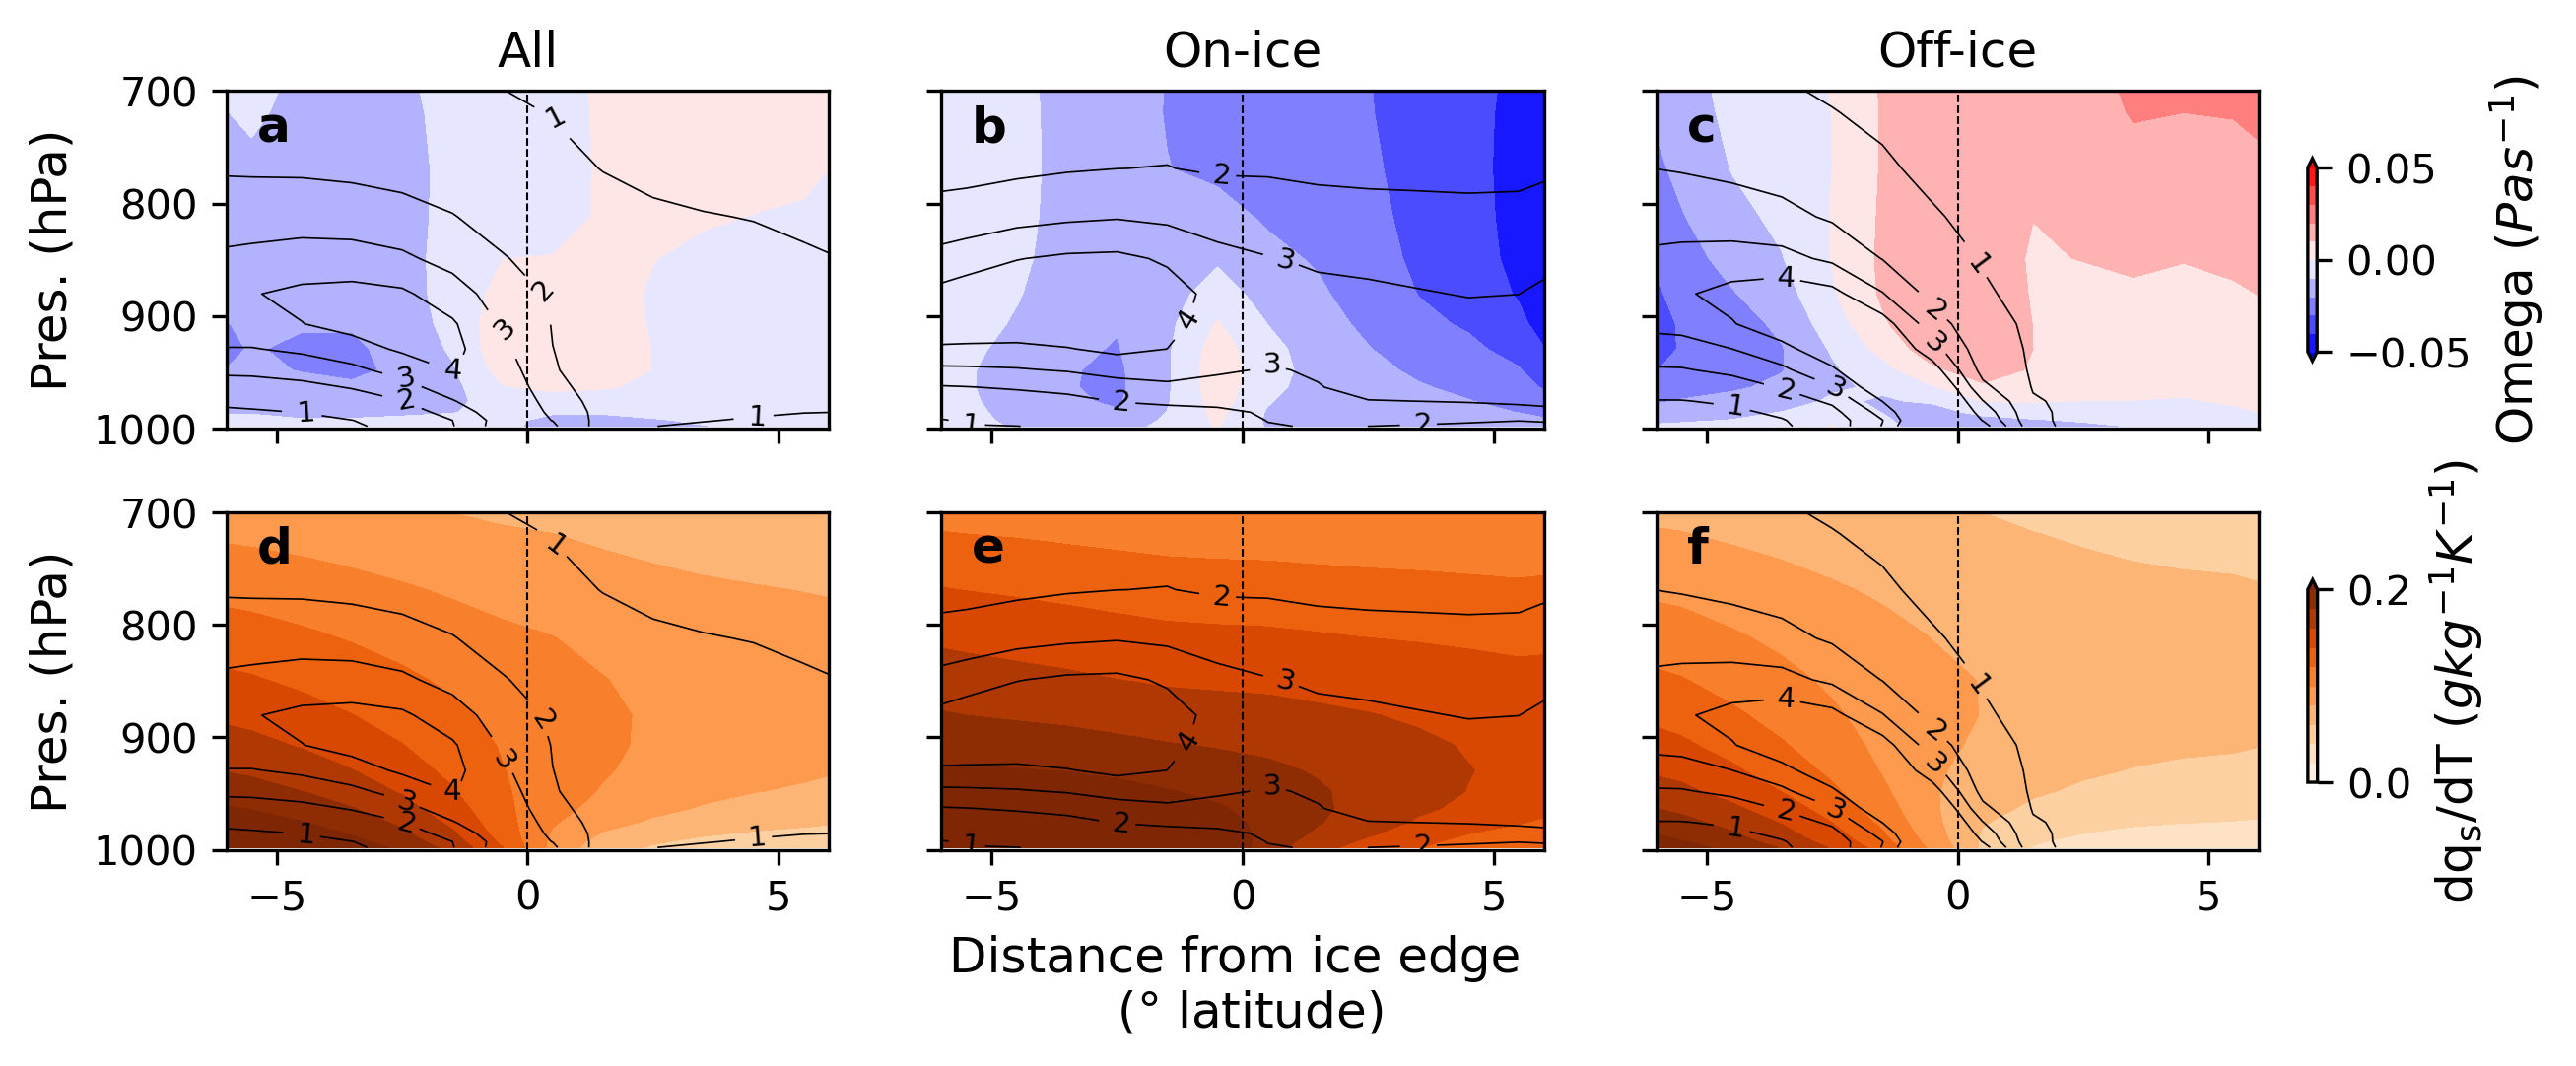

In [7]:
myfontsize = 12
fig, axs = plt.subplots(ncols = 3,
                        nrows = 2,
                        sharex = True, sharey = True,
                        figsize=(23/2.54, 8/2.54), dpi = 300)

plt.tight_layout()
x = f.distance.values
y = f.level.values
ncl = 10
mylevels1 = [1., 2., 3., 4.]

#--------------First-----------------------------------------------------------
#1

ff0 = f.isel(season = 0)
lim = 5.*(10.**-2)
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)

var = ff0.omega
plt2D(fig, axs[0,0], x, y, var, z1 = cld_amt, cmap=cm.bwr, title = 'All', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, levels1 = mylevels1)

#2
ff0 = fon.isel(season = 0)
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)

var = ff0.omega
plt2D(fig, axs[0,1], x, y, var, z1 = cld_amt, cmap=cm.bwr, title = 'On-ice', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = '', cbar = False, levels1 = mylevels1)

#3
ff0 = foff.isel(season = 0)
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)

var = ff0.omega
oax = plt2D(fig, axs[0,2], x, y, var, z1 = cld_amt, cmap=cm.bwr, title = 'Off-ice', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = '', cbar = False, levels1 = mylevels1)

cbar = fig.colorbar(oax, ax = axs[0], orientation='vertical', 
                    shrink=0.6, pad = 0.02,ticks = [-lim, 0, lim])
cbar.set_label('Omega $(Pas^{-1})$', fontsize=myfontsize)

#--------------Second-----------------------------------------------------------
ncl = 10
#1
ff0 = f.isel(season = 0)
lim = 2.*(10.**-1)
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)

var = (10.**3)*ff0.qsati
plt2D(fig, axs[1,0], x, y, var, z1 = cld_amt, cmap=cm.Oranges, title = '', levels=np.linspace(0, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, extend = 'max', levels1 = mylevels1)

#2
ff0 = fon.isel(season = 0)
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)

var = (10.**3)*ff0.qsati
plt2D(fig, axs[1,1], x, y, var, z1 = cld_amt, cmap=cm.Oranges, title = '', levels=np.linspace(0, lim, ncl + 1), 
      cbar = False, xlabel = True, extend = 'max', levels1 = mylevels1)

#3
ff0 = foff.isel(season = 0)
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)

var = (10.**3)*ff0.qsati
oax = plt2D(fig, axs[1,2], x, y, var, z1 = cld_amt, cmap=cm.Oranges, title = '', levels=np.linspace(0, lim, ncl + 1), 
      cbar = False, extend = 'max', levels1 = mylevels1)

cbar = fig.colorbar(oax, ax = axs[1], orientation='vertical', 
                    shrink=0.6, pad = 0.02,ticks = [0, lim])
cbar.set_label('$\mathrm{dq_s/dT}$ $(gkg^{-1}K^{-1})}$', fontsize=myfontsize)

mylabel = np.array((['a','b','c'],['d','e','f']))

for i in range(2):
    for j in range (3):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], 
                      transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')
        
fig.savefig('Fig13_qsdt.png', dpi=fig.dpi, bbox_inches='tight')